In [2]:
import pandas as pd
import  numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


# Plotting

After running the scripts to 

In [3]:
sns.set_palette("pastel")

In [4]:
background = pd.read_csv('/Users/drago/Repositories/BiogeMtBootcampTask/data/background_counts.csv')
motif = pd.read_csv('/Users/drago/Repositories/BiogeMtBootcampTask/data/motif_counts.csv')

Text(0.5, 1.0, 'Background length, vs Motif length')

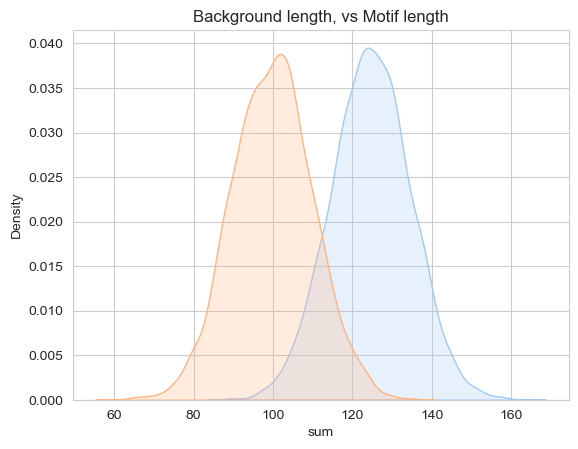

In [5]:

sns.kdeplot(background['sum'], label='Background', fill=True)
sns.kdeplot(motif['sum'], label='Background', fill=True)
plt.title('Background length, vs Motif length')

<Axes: xlabel='A', ylabel='Density'>

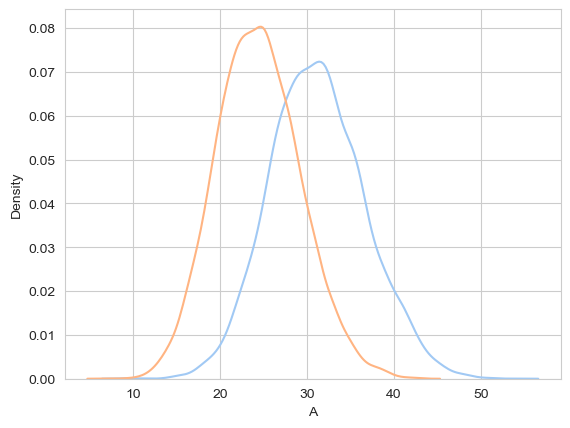

In [6]:
sns.kdeplot(background['A'])
sns.kdeplot(motif['A'])

In [7]:
motif['source'] = 'motif'
background['source'] = 'background'

dataset = pd.concat([background, motif])
 

In [8]:
dataset

,Unnamed: 0,G,A,C,T,sum,source
0,0,28,32,31,33,124,background
1,1,40,39,26,19,124,background
2,2,37,29,28,30,124,background
3,3,27,28,43,37,135,background
4,4,32,29,26,32,119,background
...,...,...,...,...,...,...,...
9995,9995,22,31,25,27,105,motif
9996,9996,30,18,24,28,100,motif
9997,9997,29,31,26,20,106,motif
9998,9998,14,25,23,35,97,motif


<Axes: xlabel='source', ylabel='sum'>

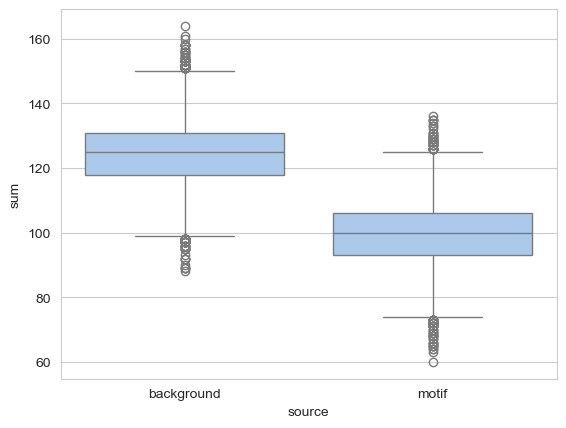

In [9]:
sns.boxplot(data=dataset, x='source', y='sum')

<Axes: xlabel='source', ylabel='sum'>

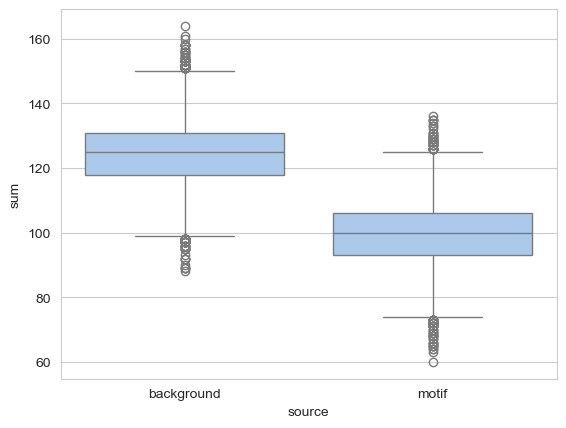

In [10]:
sns.boxplot(data=dataset, x='source', y='sum')


Text(0.5, 1.0, 'Box plot comparing the frequency of nucleotides, stratified by background & motif')

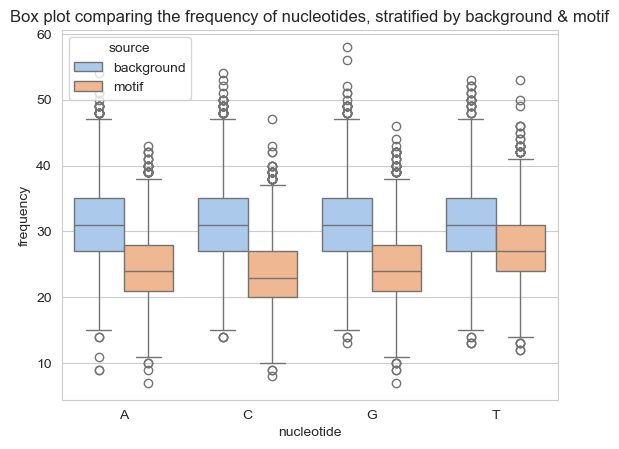

In [11]:
sns.boxplot(data=pd.melt(dataset, id_vars=['source'], value_vars=['A', 'C', 'G', 'T',], var_name='nucleotide', value_name='frequency'), x='nucleotide', y='frequency', hue='source')
plt.title('Box plot comparing the frequency of nucleotides, stratified by background & motif')

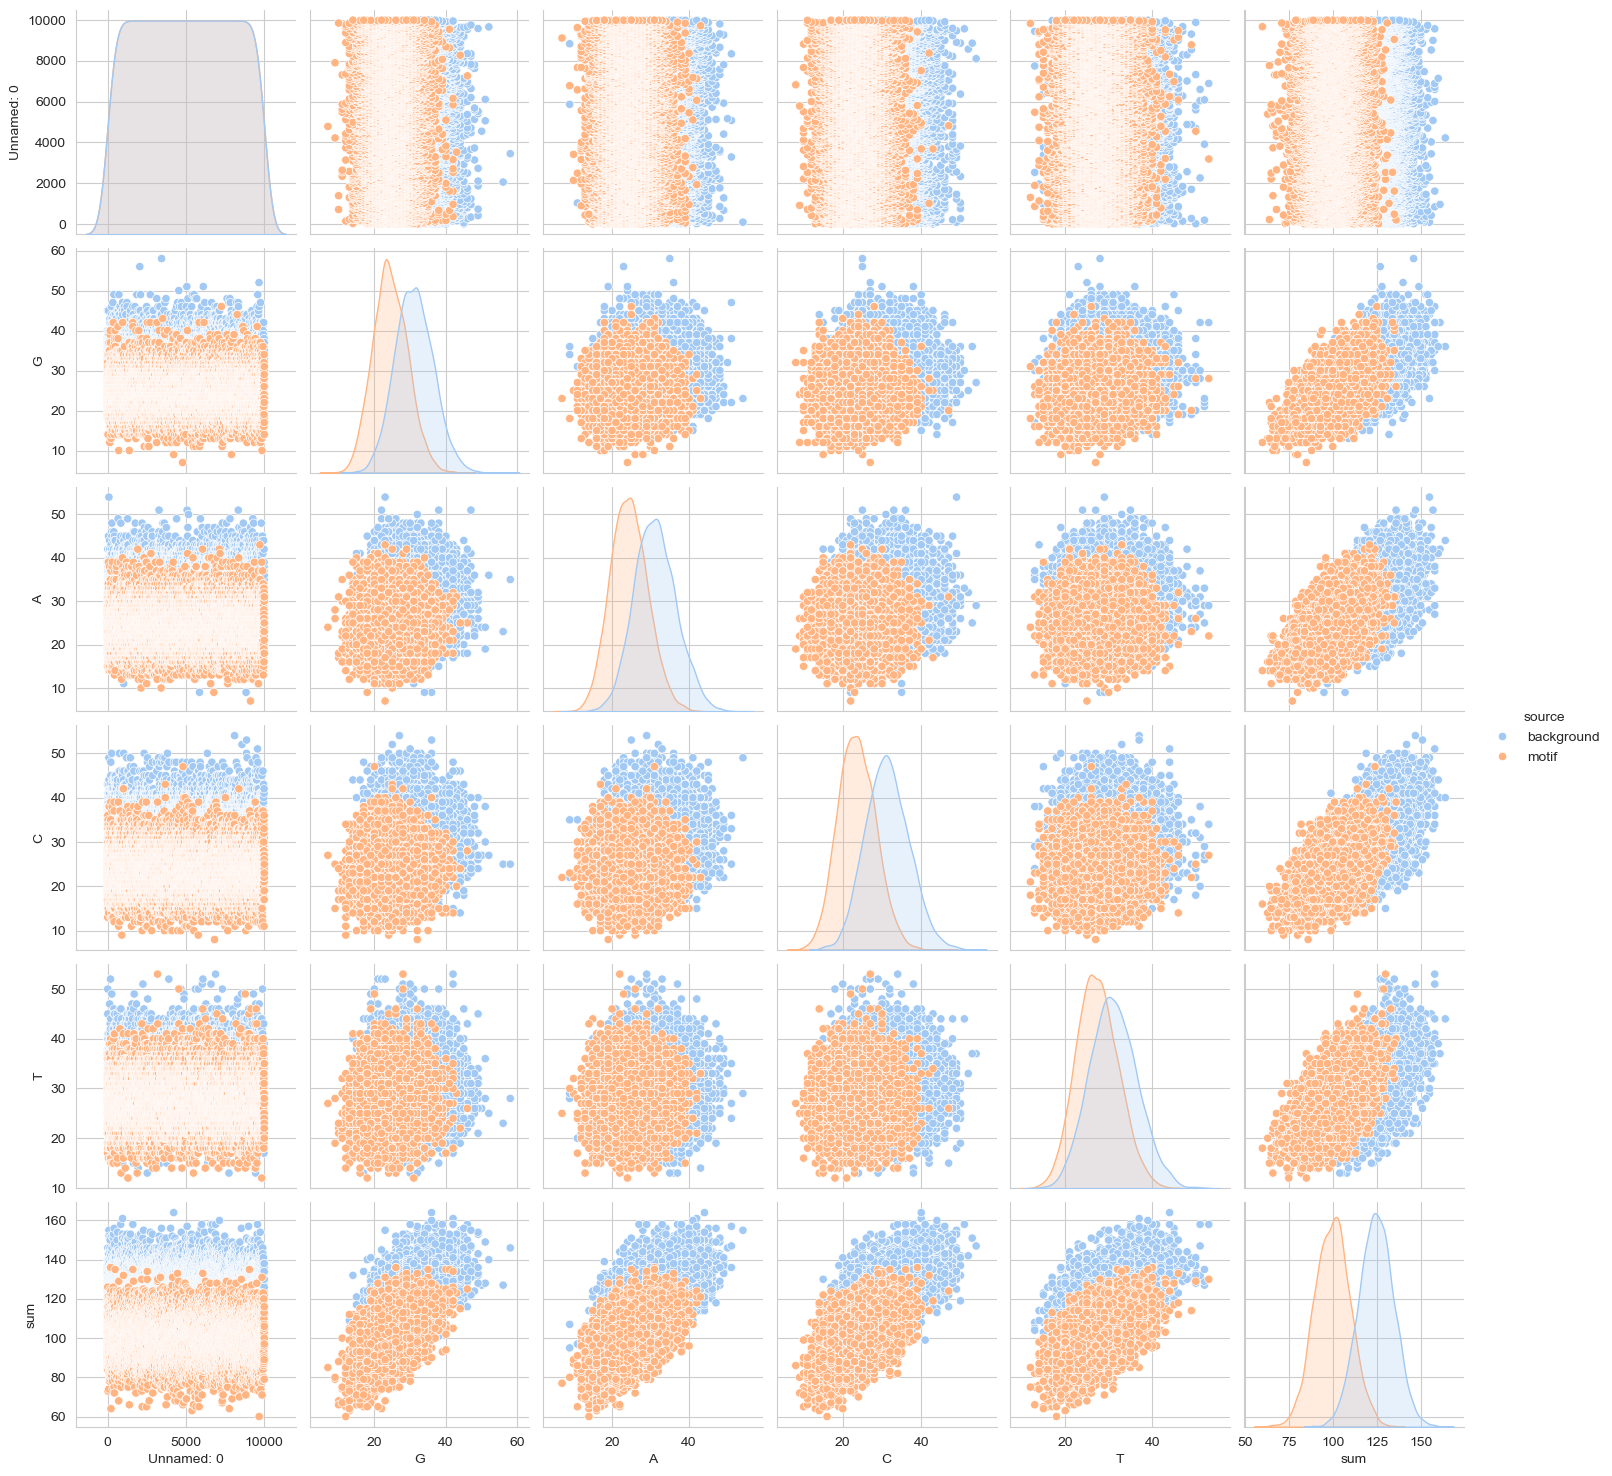

In [12]:
sns.pairplot(dataset, hue='source')

<Axes: xlabel='sum', ylabel='Count'>

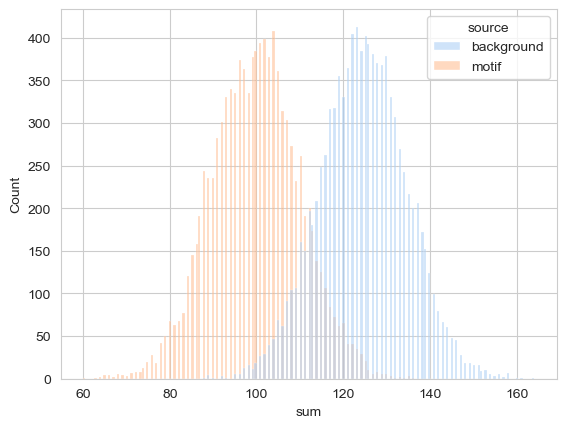

In [13]:
sns.histplot(data=dataset, hue='source', x='sum', bins=200)

<Axes: xlabel='sum', ylabel='Count'>

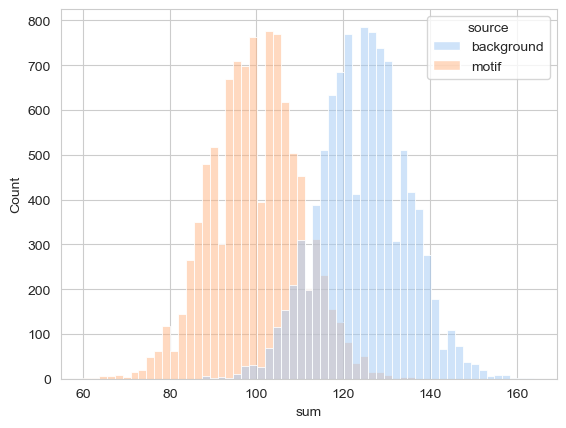

In [14]:
sns.histplot(data=dataset, hue='source', x='sum')

In [15]:
sns.barplot(data=pd.melt(dataset, id_vars=['source'], value_vars=['A', 'C', 'G', 'T',], var_name='nucleotide', value_name='frequency'), hue='source', y='variable')

ValueError: Could not interpret value `variable` for `y`. An entry with this name does not appear in `data`.

In [ ]:
sns.barplot(data=dataset, hue='source', y='sum')

In [ ]:
sns.heatmap(motif.select_dtypes(np.number).corr())

In [ ]:
sns.heatmap(background.select_dtypes(np.number).corr())


In [ ]:
sns.scatterplot(data=dataset, x='A', y='T', hue='source')

In [ ]:
sns.scatterplot(data=dataset, x='C', y='G', hue='source')

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans

In [ ]:
clustering = make_pipeline(StandardScaler(), KMeans(n_clusters=2, n_init='auto', random_state=42))

In [ ]:
clusters = clustering.fit_predict(dataset[['A', 'T', 'C', 'G']])

In [ ]:
sns.scatterplot(data=dataset, x='A', y='T', hue=clusters)

In [ ]:
clustering = make_pipeline(StandardScaler(), PCA(n_components=2), KMeans(n_clusters=2, n_init='auto', random_state=42))

In [ ]:
clusters = clustering.fit_predict(dataset[['A', 'T', 'C', 'G']])

In [ ]:
make_pipeline(clustering.steps[:2]).transform(dataset[['A', 'T', 'C', 'G']])